In [5]:
import pandas as pd

In [38]:
users = pd.read_csv('data/BX-CSV-Dump/BX-Users.csv', encoding='ISO-8859-1', delimiter=';', doublequote=False, escapechar='\\')
books = pd.read_csv('data/BX-CSV-Dump/BX-Books.csv', encoding='ISO-8859-1', delimiter=';', doublequote=False, escapechar='\\')
ratings = pd.read_csv('data/BX-CSV-Dump/BX-Book-Ratings.csv', encoding='ISO-8859-1', delimiter=';', doublequote=False, escapechar='\\')

In [39]:
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [52]:
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271379,271379,271378,271379.000000,271377,271379,271379,271379
unique,271379,242154,102027,NaN,16806,271063,271063,271063
top,0195153448,Selected Poems,Agatha Christie,NaN,Harlequin,http://images.amazon.com/images/P/226401654X.0...,http://images.amazon.com/images/P/226401654X.0...,http://images.amazon.com/images/P/226401654X.0...
freq,1,27,632,NaN,7536,2,2,2
mean,NaN,NaN,NaN,1959.756050,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,258.011363,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN


<AxesSubplot:>

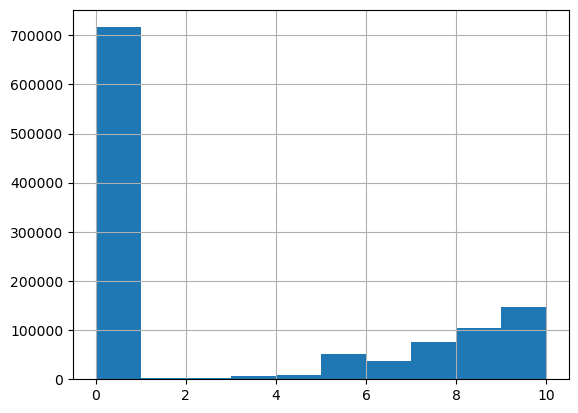

In [40]:
ratings['Book-Rating'].hist()

In [53]:
print(len(users) * len(books))
print(len(ratings))

75676205182
1149780


In [41]:
# group ratings by user id
ratings_by_user = ratings.groupby('User-ID')['Book-Rating'].count()
ratings_by_user_all = ratings_by_user

In [42]:
ratings_by_user[ratings_by_user > 1000]


User-ID
7346       1007
11601      1571
11676     13602
12538      1351
16634      1115
          ...  
271284     1172
274061     1038
274308     1493
275970     1376
278418     4533
Name: Book-Rating, Length: 117, dtype: int64

<AxesSubplot:>

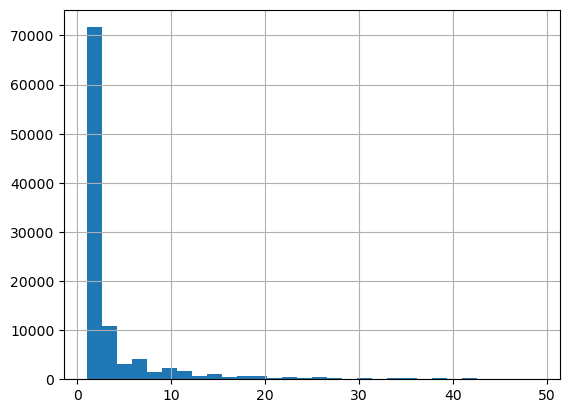

In [43]:
ratings_by_user = ratings.groupby('User-ID')['Book-Rating'].count()
# clip outliers
ratings_by_user[ratings_by_user < 50].hist(bins=30)

In [44]:
print('kept', len(ratings_by_user[ratings_by_user < 50]))
print('removed', len(ratings_by_user[ratings_by_user > 50]))

kept 101856
removed 3371


In [45]:
# remove users with 1 rating
ratings_by_user = ratings_by_user[ratings_by_user > 1]
print('kept', len(ratings_by_user))



kept 46117


In [46]:
sum(ratings_by_user)

1090614

In [47]:
sum(ratings_by_user_all)

1149780

In [48]:
ratings_by_user.head()

User-ID
8     18
9      3
10     2
14     4
16     2
Name: Book-Rating, dtype: int64

In [49]:
# keep only those ratings with users in ratings_by_user
ratings_kept = ratings[ratings['User-ID'].isin(ratings_by_user.index)]

<AxesSubplot:>

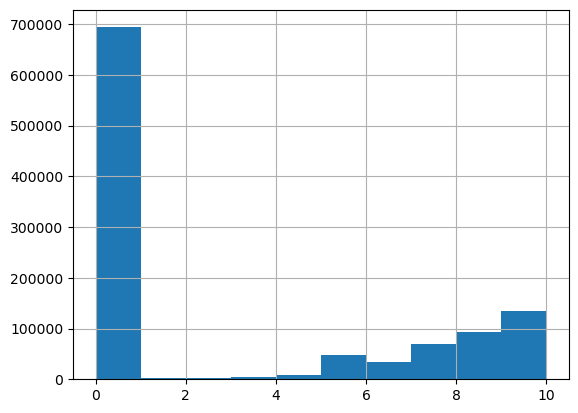

In [50]:
ratings_kept['Book-Rating'].hist()